# Importance Weights analysis

### Import Data

In [35]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [36]:
sim_path = '../../results/synth_classification_fixed_dataset_and_samples/08-05-2023-19:03'

In [37]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

runs_dirs = get_immediate_subdirectories(sim_path)

In [52]:
true_weights_list = {}
pre_AL_weights_list = {}
concept_list_dict = {}
metadata = {}

uncertainty_spreading_weights = {}
first_K_sampling_weights = {}
random_sampling_weights = {}

rs_selected_samples = {}
us_selected_samples = {}

STRATEGIES = [
    "RandomSampling",
    "UncertaintySpreading"
]

for run in runs_dirs:
    with open(sim_path + '/'+ run +'/true_weights.json', 'r') as f:
        true_weights_list[run] = json.load(f)

    with open(sim_path + '/'+ run +'/pre_AL_weights.json', 'r') as f:
        pre_AL_weights_list[run] = json.load(f)

    with open(sim_path + '/'+ run +'/metadata.json', 'r') as f:
        metadata[run] = json.load(f)

    concept_list_dict[run] = []
    for n in range(metadata[run]['n_concepts']):

        # noinspection PyTypeChecker
        concept_list_dict[run].append(pd.read_csv(
            filepath_or_buffer=sim_path + '/'+ run + '/concept_' + str(n) + '.csv',
            dtype='str'
        ).astype('float64'))

    uncertainty_spreading_weights[run] = {}
    first_K_sampling_weights[run] = {}
    random_sampling_weights[run] = {}
    for strategy in STRATEGIES:

        strategy_path = sim_path + '/' + run + '/' + strategy

        if strategy == "RandomSampling":

           # noinspection PyTypeChecker
           rs_selected_samples[run] = pd.read_csv(
               filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
               dtype='str'
           ).astype('float64')

        elif strategy == "UncertaintySpreading":

            # noinspection PyTypeChecker
            us_selected_samples[run] = pd.read_csv(
                filepath_or_buffer=strategy_path + '/' + 'selected_samples.csv',
                dtype='str'
           ).astype('float64')

        for n in range(metadata[run]['n_samples']):

            n_sample = n + 1

            with open(strategy_path + '/' + str(n_sample) + '_samples.json', 'r') as f:

                if strategy == "RandomSampling":
                    random_sampling_weights[run][n_sample] = json.load(f)

                elif strategy == "UncertaintySpreading":
                    uncertainty_spreading_weights[run][n_sample] = json.load(f)

                elif strategy == "FirstKSampling":
                    first_K_sampling_weights[run][n_sample] = json.load(f)

In [53]:
rs_selected_samples


{'0':          X_0        X_1  y_0
 0   1.842922  -2.816910  0.0
 1  -0.818427   0.579742  0.0
 2   2.089754   8.411864  1.0
 3  -2.225477   8.588115  1.0
 4  -1.141507   7.747115  1.0
 5   0.637977   6.384227  1.0
 6   2.278755   8.993262  1.0
 7  -2.486661  -2.710622  0.0
 8   3.099780  12.126535  1.0
 9   1.281256   9.474333  1.0
 10  0.709899  10.550406  1.0
 11  1.555125   8.199432  1.0
 12  4.259859   1.202367  2.0
 13 -0.515285  -2.581603  0.0
 14  1.150721  -3.625016  0.0
 15  0.795601  -1.158846  0.0
 16  1.067263   0.383899  0.0
 17  1.835107  -1.001618  0.0
 18  0.873114   7.346497  1.0
 19  0.015503   6.881083  1.0
 20  3.642415   1.123315  2.0
 21  2.579934  -2.078370  0.0
 22  0.738162   9.595698  1.0
 23  5.332350  10.796155  1.0
 24 -0.030250   7.324418  1.0
 25  5.108745   2.096867  2.0
 26  4.247170   8.792375  1.0
 27  3.035798   0.399204  0.0
 28  2.663579  -1.398893  2.0
 29  1.098978  -0.251327  0.0
 30  0.290684  -2.597724  2.0
 31 -1.624017   3.887985  1.0
 32 -

### Plot Concepts


In [ ]:
for (run, concept_list) in concept_list_dict.items():
    for index,concept in enumerate(concept_list):
        classes_groups = concept.groupby('y_0')

        fig, ax = plt.subplots()
        for i, (label, group) in enumerate(classes_groups):
            ax.scatter(group['X_0'], group['X_1'],
                    label=label)
        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()


### Compute MAE

In [41]:
mae_pre = [mean_absolute_error(true_weights_list[run], pre_AL_weights_list[run]) for run in runs_dirs]

mae_pre = np.average(mae_pre)
mae_pre

0.6982487676920636

In [42]:
mae_us = {}
for run in uncertainty_spreading_weights.keys():
    mae_us[run] = []
    for key in uncertainty_spreading_weights[run].keys():
        mae_us[run].append(mean_absolute_error(true_weights_list[run], uncertainty_spreading_weights[run][key]))


In [43]:
mae_rs = {}
for run in random_sampling_weights.keys():
    mae_rs[run] = []
    for key in random_sampling_weights[run].keys():
        mae_rs[run].append(mean_absolute_error(true_weights_list[run], random_sampling_weights[run][key]))

In [44]:
mae_us_mean = np.mean(a=list(mae_us.values()), axis=0)
mae_rs_mean = np.mean(a=list(mae_rs.values()), axis=0)

In [45]:
mae_us_mean

array([0.69824877, 0.69081391, 0.68909146, 0.68804322, 0.68722454,
       0.68761805, 0.68780956, 0.68854097, 0.68895603, 0.68941441,
       0.68954759, 0.69057952, 0.69173326, 0.69255235, 0.69372228,
       0.69402583, 0.69541653, 0.69647462, 0.69819038, 0.69908307,
       0.70077961, 0.7026731 , 0.70427386, 0.70590064, 0.70727605,
       0.70861808, 0.7096218 , 0.71139637, 0.71293339, 0.71430455,
       0.71535814, 0.71674173, 0.71759122, 0.71815864, 0.71911827,
       0.72047895, 0.72073085, 0.72123411, 0.72250871, 0.72364948,
       0.72442056, 0.72541348, 0.72656505, 0.72669914, 0.72753576,
       0.72841416, 0.7294135 , 0.72987316, 0.73032115, 0.73124273,
       0.73138482, 0.7319033 , 0.73262704, 0.73254462, 0.7327379 ,
       0.73320242, 0.73374676, 0.73417912, 0.73441759, 0.7342804 ,
       0.73480641, 0.73493825, 0.7353752 , 0.73484121, 0.73476414,
       0.73515296, 0.7353704 , 0.73569482, 0.73539559, 0.73523828,
       0.73534077, 0.73505173, 0.73561928, 0.73565512, 0.73610

### Plot Results

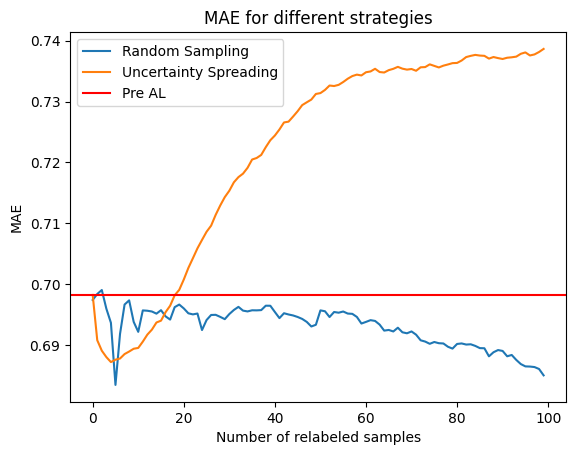

In [46]:
# create a new figure and axis object
fig, ax = plt.subplots()

# plot the MAE values for each model as a line
ax.plot(list(range(len(mae_rs_mean))), list(mae_rs_mean), label='Random Sampling')
ax.plot(list(range(len(mae_us_mean))),list(mae_us_mean), label='Uncertainty Spreading')
plt.axhline(y=mae_pre, color='r', linestyle='-', label='Pre AL')

# add a legend to the plot
ax.legend()

# set the x-axis label
ax.set_xlabel('Number of relabeled samples')

# set the y-axis label
ax.set_ylabel('MAE')

# set the title of the plot
ax.set_title('MAE for different strategies')

# display the plot
plt.show()


In [47]:
pd.set_option('display.max_rows', None)

In [48]:
unmatched_samples = rs_selected_samples

In [49]:
for (run, concept_list) in concept_list_dict.items():
    for concept in concept_list:
        unmatched_samples[run] = pd.merge(unmatched_samples[run], concept, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)


In [50]:
# useful to know how many samples have been relabeled with a different label
# from the original one when applying change to the select samples methods
len(unmatched_samples)

5

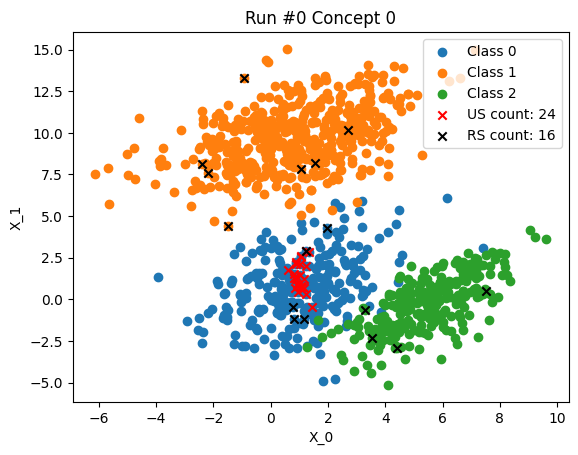

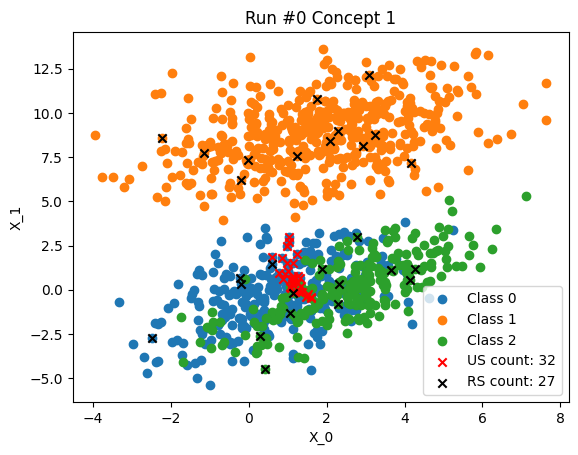

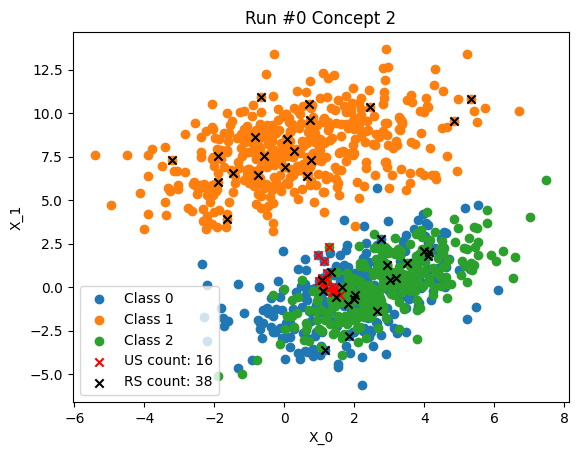

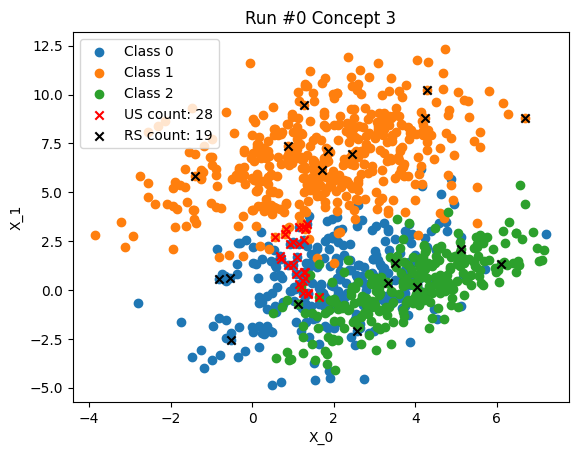

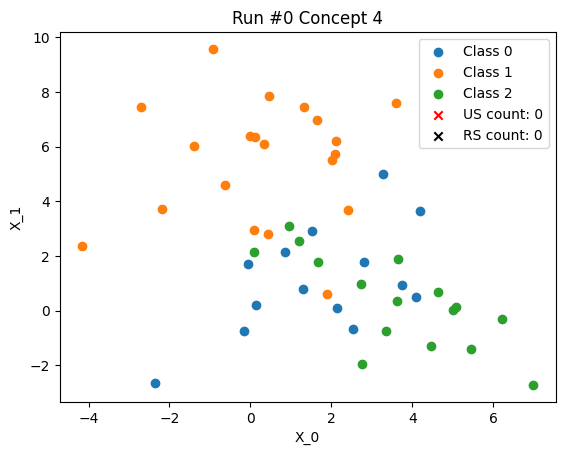

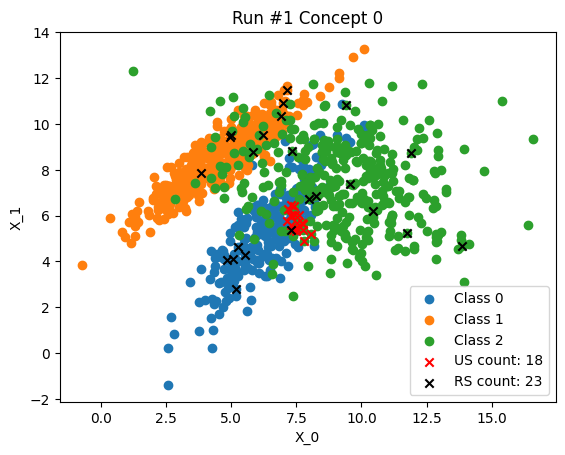

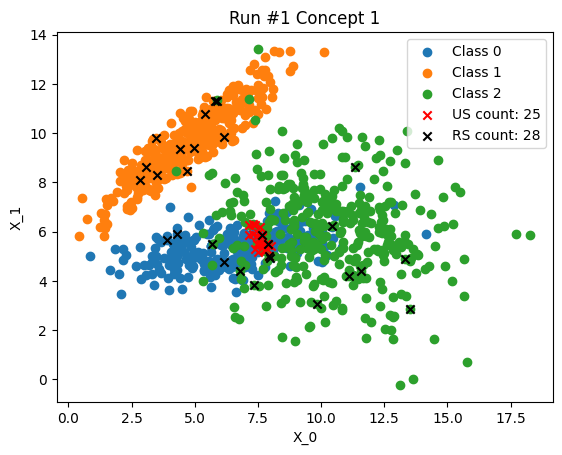

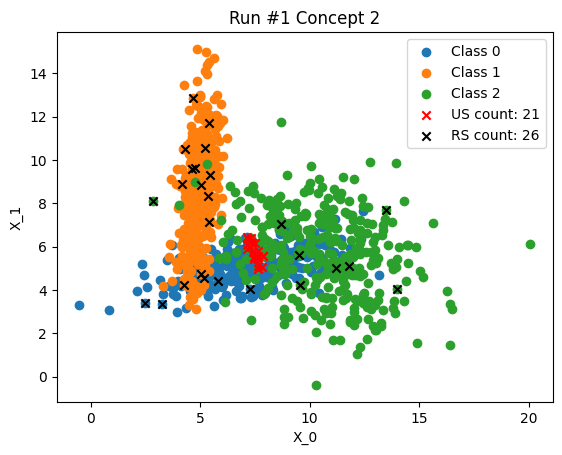

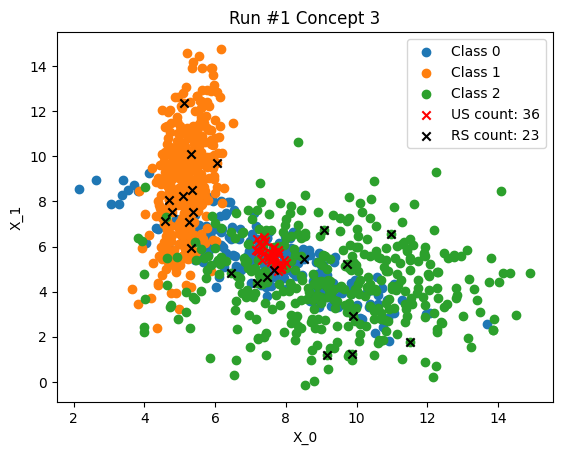

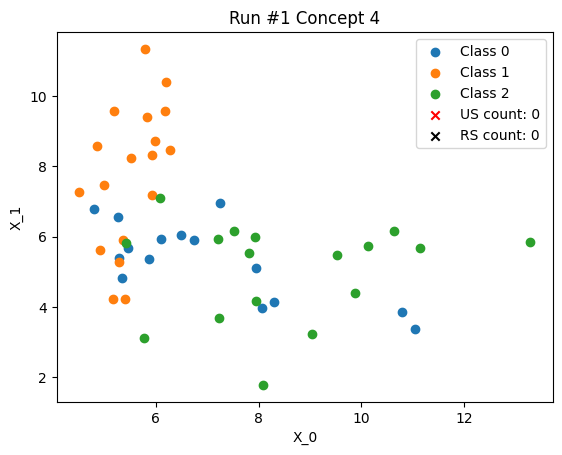

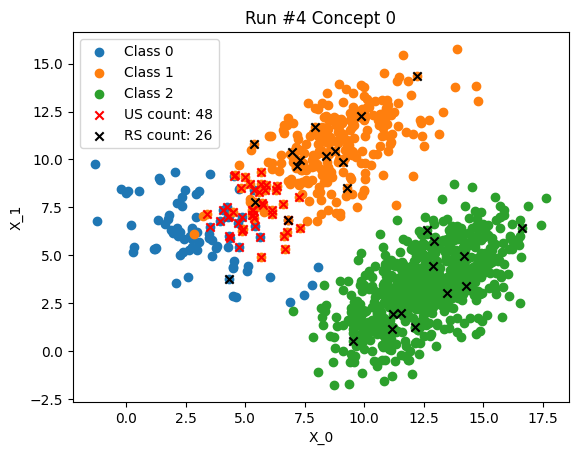

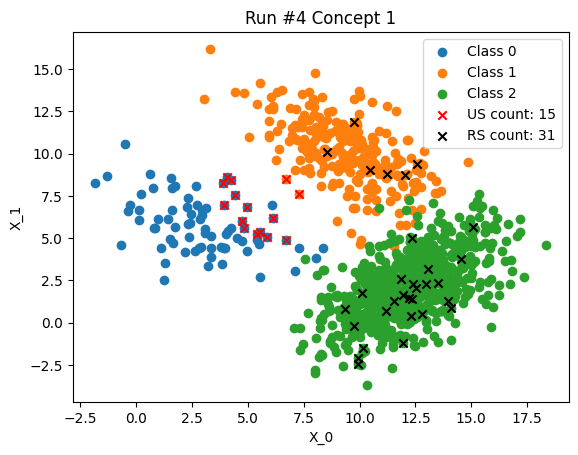

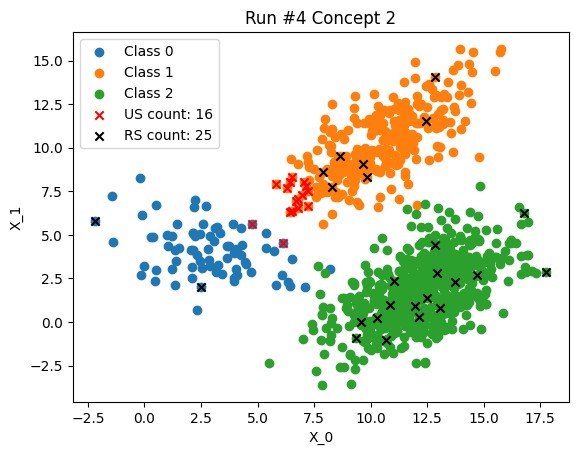

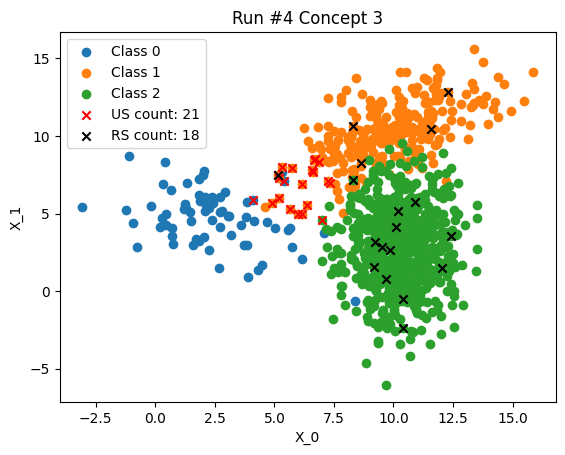

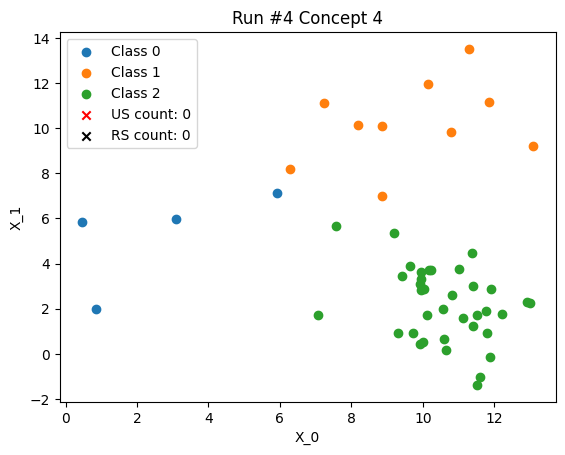

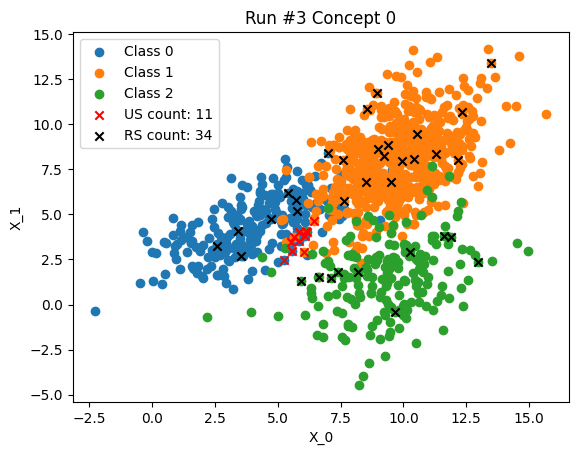

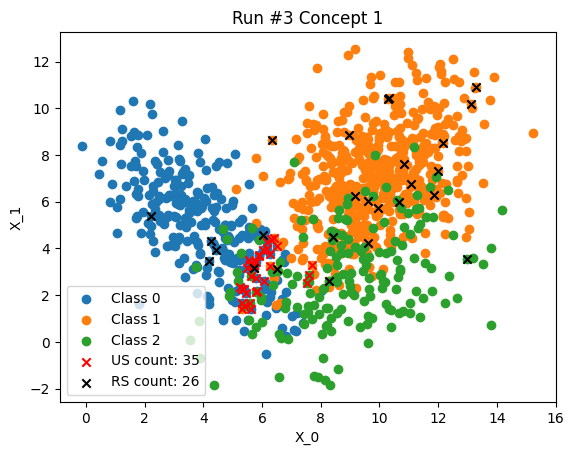

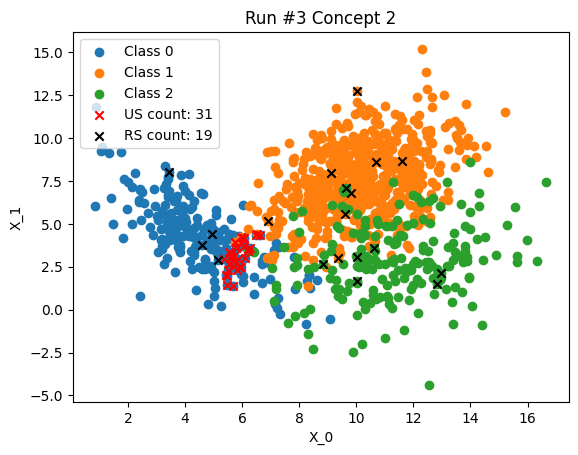

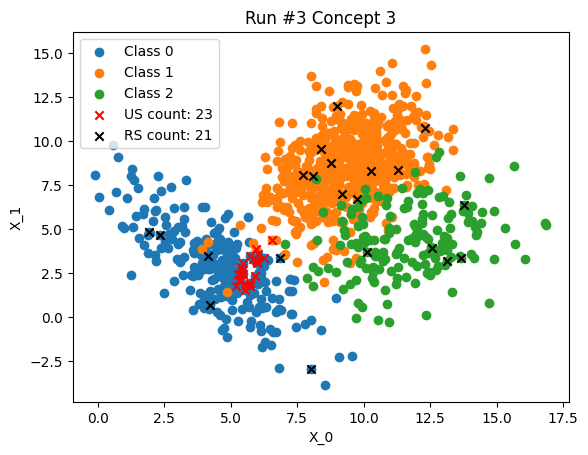

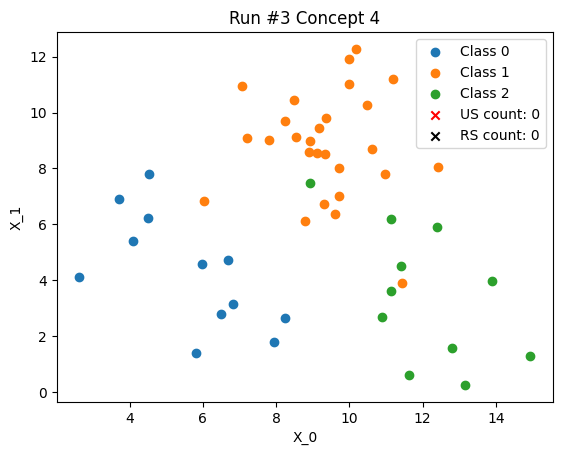

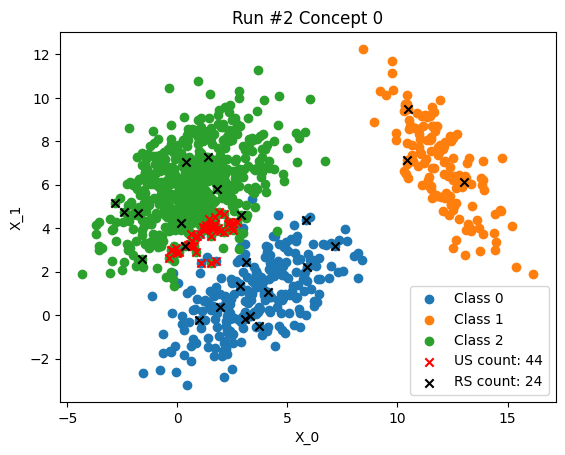

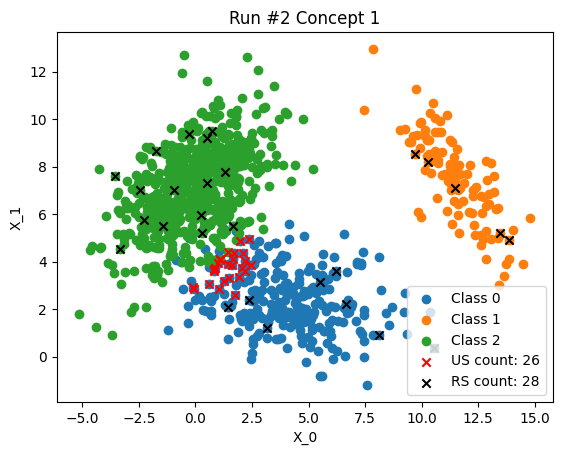

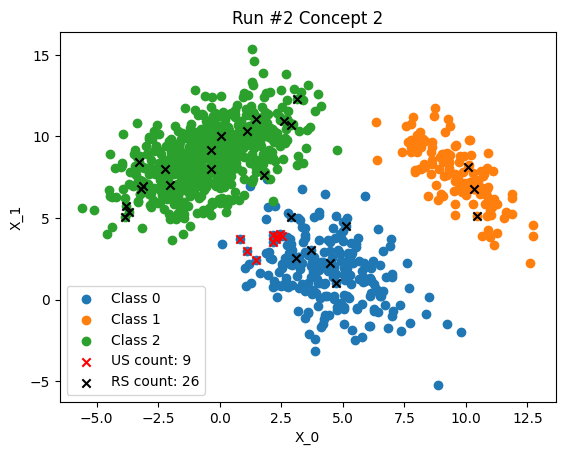

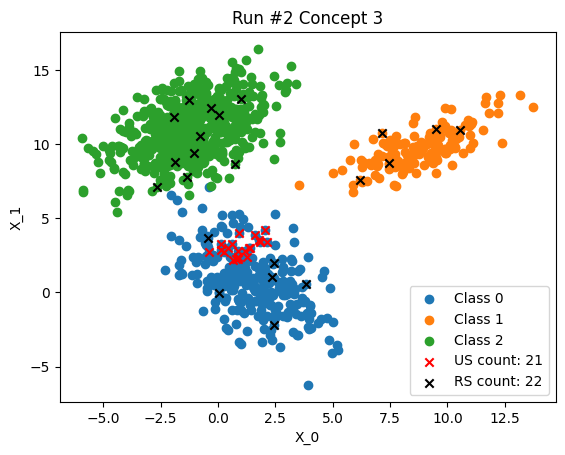

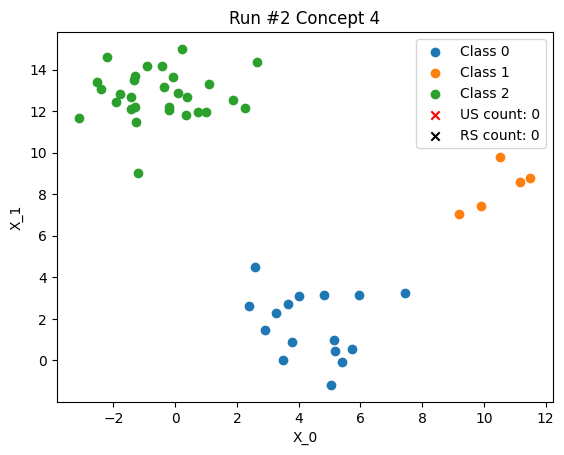

In [54]:
for (run, concept_list) in concept_list_dict.items():
    for index,concept in enumerate(concept_list):
        classes_groups = concept.groupby('y_0')

        fig, ax = plt.subplots()
        for i, (label, group) in enumerate(classes_groups):
            ax.scatter(group['X_0'], group['X_1'],
                    label='Class ' + str(int(label)))
        selected_samples_us = pd.merge(concept, us_selected_samples[run])
        selected_samples_rs = pd.merge(concept, rs_selected_samples[run])
        plt.scatter(selected_samples_us['X_0'], selected_samples_us['X_1'], c='red', marker='x', label='US count: ' + str(selected_samples_us.value_counts().count()))
        plt.scatter(selected_samples_rs['X_0'], selected_samples_rs['X_1'], c='black', marker='x', label='RS count: ' + str(selected_samples_rs.value_counts().count()))
        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()
